# In the name of ALLAH

In [13]:
# import library that we need 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [14]:
# import and preprocess data

df = pd.read_csv("primary_dataset.csv")
df['Weights'] = 1 / (2024 - df['Year'])
df.head(10)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Weights
0,Afghanistan,Asia,2015,53.2,70.4,227.7350,0.000,65,42,23.3,...,0.03,556,34.41,17.2,17.3,3.6,0,1,63.4,0.111111
1,Afghanistan,Asia,2014,55.2,73.6,231.9780,0.010,62,44,23.2,...,0.03,565,33.37,17.5,17.5,3.5,0,1,63.0,0.100000
2,Afghanistan,Asia,2013,57.3,76.9,236.2210,0.010,64,38,23.0,...,0.03,569,32.27,17.7,17.7,3.5,0,1,62.5,0.090909
3,Afghanistan,Asia,2012,59.5,80.3,240.4640,0.010,67,33,22.9,...,0.03,558,31.16,17.9,18.0,3.4,0,1,62.1,0.083333
4,Afghanistan,Asia,2011,61.8,84.0,245.3000,0.010,68,31,22.8,...,0.02,512,30.12,18.2,18.2,3.3,0,1,61.6,0.076923
5,Afghanistan,Asia,2010,64.2,87.8,250.1350,0.020,66,29,22.7,...,0.02,526,29.19,18.4,18.4,3.2,0,1,61.0,0.071429
6,Afghanistan,Asia,2009,66.7,91.7,254.9705,0.010,63,24,22.6,...,0.02,473,28.39,18.6,18.7,3.1,0,1,60.5,0.066667
7,Afghanistan,Asia,2008,69.2,95.7,259.8060,0.028,64,23,22.5,...,0.02,399,27.72,18.8,18.9,3.0,0,1,59.9,0.062500
8,Afghanistan,Asia,2007,71.9,99.9,264.6415,0.018,63,21,22.4,...,0.02,393,27.10,19.0,19.1,2.9,0,1,59.4,0.058824
9,Afghanistan,Asia,2006,74.6,104.1,271.4905,0.026,64,18,22.3,...,0.02,354,26.43,19.2,19.3,2.7,0,1,58.8,0.055556


In [16]:

grouped_df_weighted_mean = df.groupby(['Country', 'Region']).agg(
    Infant_deaths=('Infant_deaths', lambda x: np.average(x, weights=df.loc[x.index, 'Weights'])),
    Under_five_deaths = ('Under_five_deaths', lambda x: np.average(x, weights=df.loc[x.index, 'Weights'])),
    Alcohol_consumption = ('Alcohol_consumption', lambda x: np.average(x, weights=df.loc[x.index, 'Weights'])),
    Adult_mortality = ('Adult_mortality', lambda x: np.average(x, weights=df.loc[x.index, 'Weights'])),
    Incidents_HIV = ('Incidents_HIV', lambda x: np.average(x, weights=df.loc[x.index, 'Weights'])),
    GDP_per_capita = ('GDP_per_capita', lambda x: np.average(x, weights=df.loc[x.index, 'Weights'])),
    Population_mln = ('Population_mln', lambda x: np.average(x, weights=df.loc[x.index, 'Weights'])),
    Life_expectancy = ('Life_expectancy', lambda x: np.average(x, weights=df.loc[x.index, 'Weights']))
    # Add more columns as needed
).reset_index()


In [ ]:
grouped_df_weighted_mean.head(10)

,,Infant_deaths,Under_five_deaths,Alcohol_consumption,Adult_mortality,Incidents_HIV,GDP_per_capita,Population_mln,Life_expectancy
Country,Region,,,,,,,,
Afghanistan,Asia,67.630574,93.172047,0.014428,258.239883,0.023642,444.839721,28.661693,60.368877
Albania,Rest of Europe,13.788649,15.491038,4.683369,81.762733,0.027038,3258.783872,2.950233,76.329069
Algeria,Africa,25.573979,29.809294,0.421870,109.543490,0.025003,3831.119447,35.637332,74.275531
Angola,Africa,82.612264,132.940610,5.572322,285.821584,1.257912,2778.747076,22.708497,54.093368
Antigua and Barbuda,Central America and Caribbean,8.893526,10.781392,8.001650,140.079236,0.136419,14615.752093,0.086265,75.573774
Argentina,South America,13.212090,14.799779,8.015143,125.894200,0.143135,12599.663664,40.483907,75.089922
Armenia,Rest of Europe,17.746012,19.918758,3.833084,135.972010,0.081050,2858.874266,2.937043,73.249282
Australia,Oceania,4.127032,4.921767,10.134106,64.687229,0.046771,52766.869903,21.732614,81.382392
Austria,European Union,3.664914,4.430136,12.166160,75.638578,0.080000,42889.225655,8.348474,80.270945


In [17]:
grouped_df_mean = df.groupby(['Country', 'Region'])[['Infant_deaths',
                                                    'Under_five_deaths',
                                                    'Alcohol_consumption',
                                                    'Adult_mortality',
                                                    'Incidents_HIV',
                                                    'GDP_per_capita',
                                                    'Population_mln',
                                                    'Life_expectancy']].mean().reset_index()

In [18]:
grouped_df_mean.head(10)

,Country,Region,Infant_deaths,Under_five_deaths,Alcohol_consumption,Adult_mortality,Incidents_HIV,GDP_per_capita,Population_mln,Life_expectancy
0,Afghanistan,Asia,71.08125,98.61250,0.016125,265.804969,0.022500,408.5625,27.450625,59.65625
1,Albania,Rest of Europe,15.25625,17.14375,4.696875,83.132969,0.025625,3071.1250,2.969375,75.95000
2,Algeria,Africa,26.75625,31.19375,0.400625,113.439281,0.021875,3745.1250,34.820625,73.78750
3,Angola,Africa,88.76875,144.16250,4.935625,297.844063,1.303750,2647.8125,21.623750,52.82500
4,Antigua and Barbuda,Central America and Caribbean,9.47500,11.51875,7.755000,142.478813,0.125000,14678.7500,0.085000,75.35000
5,Argentina,South America,13.85000,15.50625,7.959375,127.912656,0.145625,12169.1250,39.913125,74.86250
6,Armenia,Rest of Europe,19.03125,21.39375,3.734375,137.939938,0.080625,2657.3750,2.951250,72.98750
7,Australia,Oceania,4.31250,5.15625,10.145625,65.958594,0.046875,51750.9375,21.289375,81.11250
8,Austria,European Union,3.81250,4.60000,12.226875,78.310500,0.080000,42376.0000,8.295625,79.97500
9,Azerbaijan,Asia,39.45625,46.33750,0.747500,144.664344,0.124375,3813.6875,8.760000,69.72500


In [28]:
X = grouped_df_weighted_mean['GDP_per_capita'].values.reshape(-1,1)
kmeans = KMeans(n_clusters=13)
clusters = kmeans.fit_predict(X)

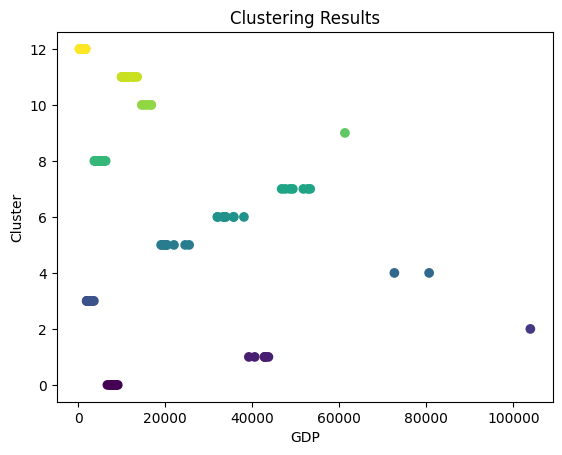

In [33]:
import matplotlib.pyplot as plt

# Assuming 'X' contains the feature data and 'clusters' contains the cluster labels
plt.scatter(X, clusters, c=clusters, cmap='viridis')  # Plotting the clusters
plt.xlabel('GDP')  # Label for x-axis
plt.ylabel('Cluster')  # Label for y-axis
plt.title('Clustering Results')  # Title for the plot
plt.show()  # Display the plot


In [32]:
# Assuming 'specific_data_point' is the data point for which you want to find the cluster
specific_data_point_index = grouped_df_weighted_mean.index[grouped_df_weighted_mean['Country'] == 'Iran, Islamic Rep.'].tolist()[0]
specific_data_point_cluster = clusters[specific_data_point_index]

print(f"The specific data point belongs to Cluster {specific_data_point_cluster}")


The specific data point belongs to Cluster 8


np.int32(1)